In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
import networkx as nx
import seaborn as sns
sns.set()

In [37]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

 ### Please run the following code line to generate the US map 

In [38]:
#!pip install plotly i already have this package installed

# Question 1 

The Algorithm can be broken down into 4 basic steps: 

1. Construct a similarity Graph, S
2. Determine the Adjacency Matrix A 
3. Compute the degree matrix, D and the Laplacian matrix, L = D - A
4. Using the second smallest eigenvector as input, train a k-means model and use it to classify the data. 

### Typically, you will have a dataset composed of samples (rows) and their features (columns) as below. However, the spectral clustering algorithm can only be applied to a graph of connected nodes. Therefore, we must apply transformations to our data in order to go from a table of rows and columns to a graph

1. How many samples and features does that data have ?

In [45]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
X.shape

(12, 2)

 this dataset has 2 features 

2. Plot the data with X-axis as feature 1 and Y-axis as feature 2. How many clusters can you see ?

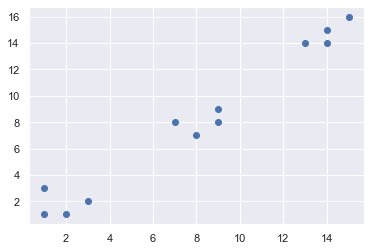

In [46]:
plt.scatter(X[:,0], X[:,1])

we can see 3 clusters

3. Construct the similarity (S) matrix, a NxN matrix where N is the number of samples. Fill the cells with the euclidean distance between each pair of points.

In [47]:
S = pairwise_distances(X, metric="euclidean")
print(S)

[[ 0.          2.23606798  2.          2.23606798  7.81024968  9.43398113
  10.          8.06225775 16.2788206  17.02938637 19.10497317 17.69180601]
 [ 2.23606798  0.          1.          1.41421356  8.60232527  9.89949494
  10.63014581  8.48528137 17.02938637 17.69180601 19.84943324 18.43908891]
 [ 2.          1.          0.          2.23606798  9.21954446 10.63014581
  11.3137085   9.21954446 17.69180601 18.38477631 20.51828453 19.10497317]
 [ 2.23606798  1.41421356  2.23606798  0.          7.21110255  8.48528137
   9.21954446  7.07106781 15.62049935 16.2788206  18.43908891 17.02938637]
 [ 7.81024968  8.60232527  9.21954446  7.21110255  0.          2.
   2.23606798  1.41421356  8.48528137  9.21954446 11.3137085   9.89949494]
 [ 9.43398113  9.89949494 10.63014581  8.48528137  2.          0.
   1.          1.41421356  7.21110255  7.81024968 10.          8.60232527]
 [10.         10.63014581 11.3137085   9.21954446  2.23606798  1.
   0.          2.23606798  6.40312424  7.07106781  9.219

4. We create the adjacency (A) matrix by setting a threshold on euclidean distances such that if the distance is greater than or equal to 5, we set the value to 0 and 1 otherwise.

In [50]:
A = nx.adjacency_matrix(G)
D = np.diag(np.sum(np.array(A.todense()), axis=1))
print(A.todense())

[[1 1 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]]


Lets draw the graph connecting only the nodes which has 1 

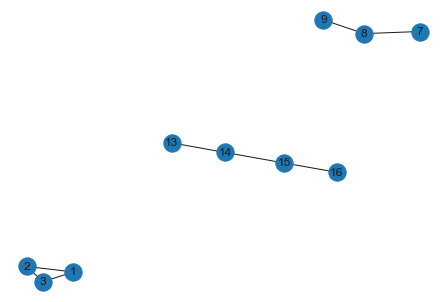

In [51]:
G = nx.Graph()
G.add_edges_from(X)
nx.draw(G,with_labels = True)

5. Calculate the degree matrix, D and calculate the Laplacian matrix, L 

In [54]:
A = nx.adjacency_matrix(G)
D = np.diag(np.sum(np.array(A.todense()), axis=1))
L = D-A
L

matrix([[ 2, -1, -1,  0,  0,  0,  0,  0,  0,  0],
        [-1,  2, -1,  0,  0,  0,  0,  0,  0,  0],
        [-1, -1,  2,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1, -1,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  2, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -1,  2, -1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1,  2, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1]])

6. Find the eigen values of the L and round them upto 2 decimal places. Sort them in ascending order and Find the smallest eigen value. Find the fiedler number ?  Use `np.linalg.eig` function to evaluate eigen vectors and eigen values. 

In [81]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(np.around(e,2))
# eigenvectors
print('eigenvectors:')
print(np.around(v,2))

eigenvalues:
[ 3.   -0.    3.    3.    1.   -0.    3.41  2.    0.    0.59]
eigenvectors:
[[ 0.82 -0.58  0.29  0.    0.    0.    0.    0.    0.    0.  ]
 [-0.41 -0.58 -0.81  0.    0.    0.    0.    0.    0.    0.  ]
 [-0.41 -0.58  0.51  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.41 -0.71  0.58  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.82  0.    0.58  0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.41  0.71  0.58  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.27  0.5  -0.5  -0.65]
 [ 0.    0.    0.    0.    0.    0.   -0.65 -0.5  -0.5  -0.27]
 [ 0.    0.    0.    0.    0.    0.    0.65 -0.5  -0.5   0.27]
 [ 0.    0.    0.    0.    0.    0.   -0.27  0.5  -0.5   0.65]]


In [83]:
print('sorted eigen values')
np.sort(np.around(e,2))

sorted eigen values


array([-0.  , -0.  ,  0.  ,  0.59,  1.  ,  2.  ,  3.  ,  3.  ,  3.  ,
        3.41])

In [72]:
i = np.where(e < 10e-6)[0]
i


array([1, 5, 8])

these are the eigen values that are extremely close to zero, the fielder eigen value is actually the last value in the vector above [10]

7. Plot the eigen vector corresponds to the fiedler eigen value and do you see the clusters? 


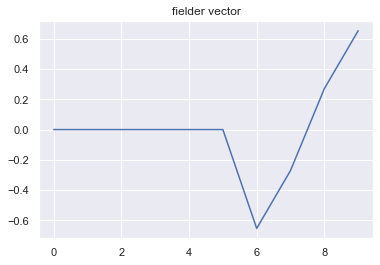

In [77]:
plt.title('fielder vector')
plt.plot(v[:, 9])

i cant really see the clusters and this is probably due to the fact that the graph represented by the points given are not connected rather they are disjointed and for these types of grpahs wew would expected 3 eigen values close to zero we can see them in the plot below :


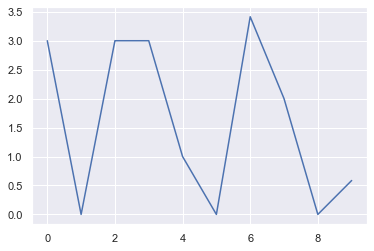

In [78]:
plt.plot(e)

In [85]:
U = np.array(v[:,5])
km = KMeans(init='k-means++', n_clusters=2)
km.fit(U)
km.labels_

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

# Question 2

For the following graph write down the  Adjacency matrix A, Degree Matrix D and Laplacian Matrix L. 
<img src= "graph.png" >

pictuer below:

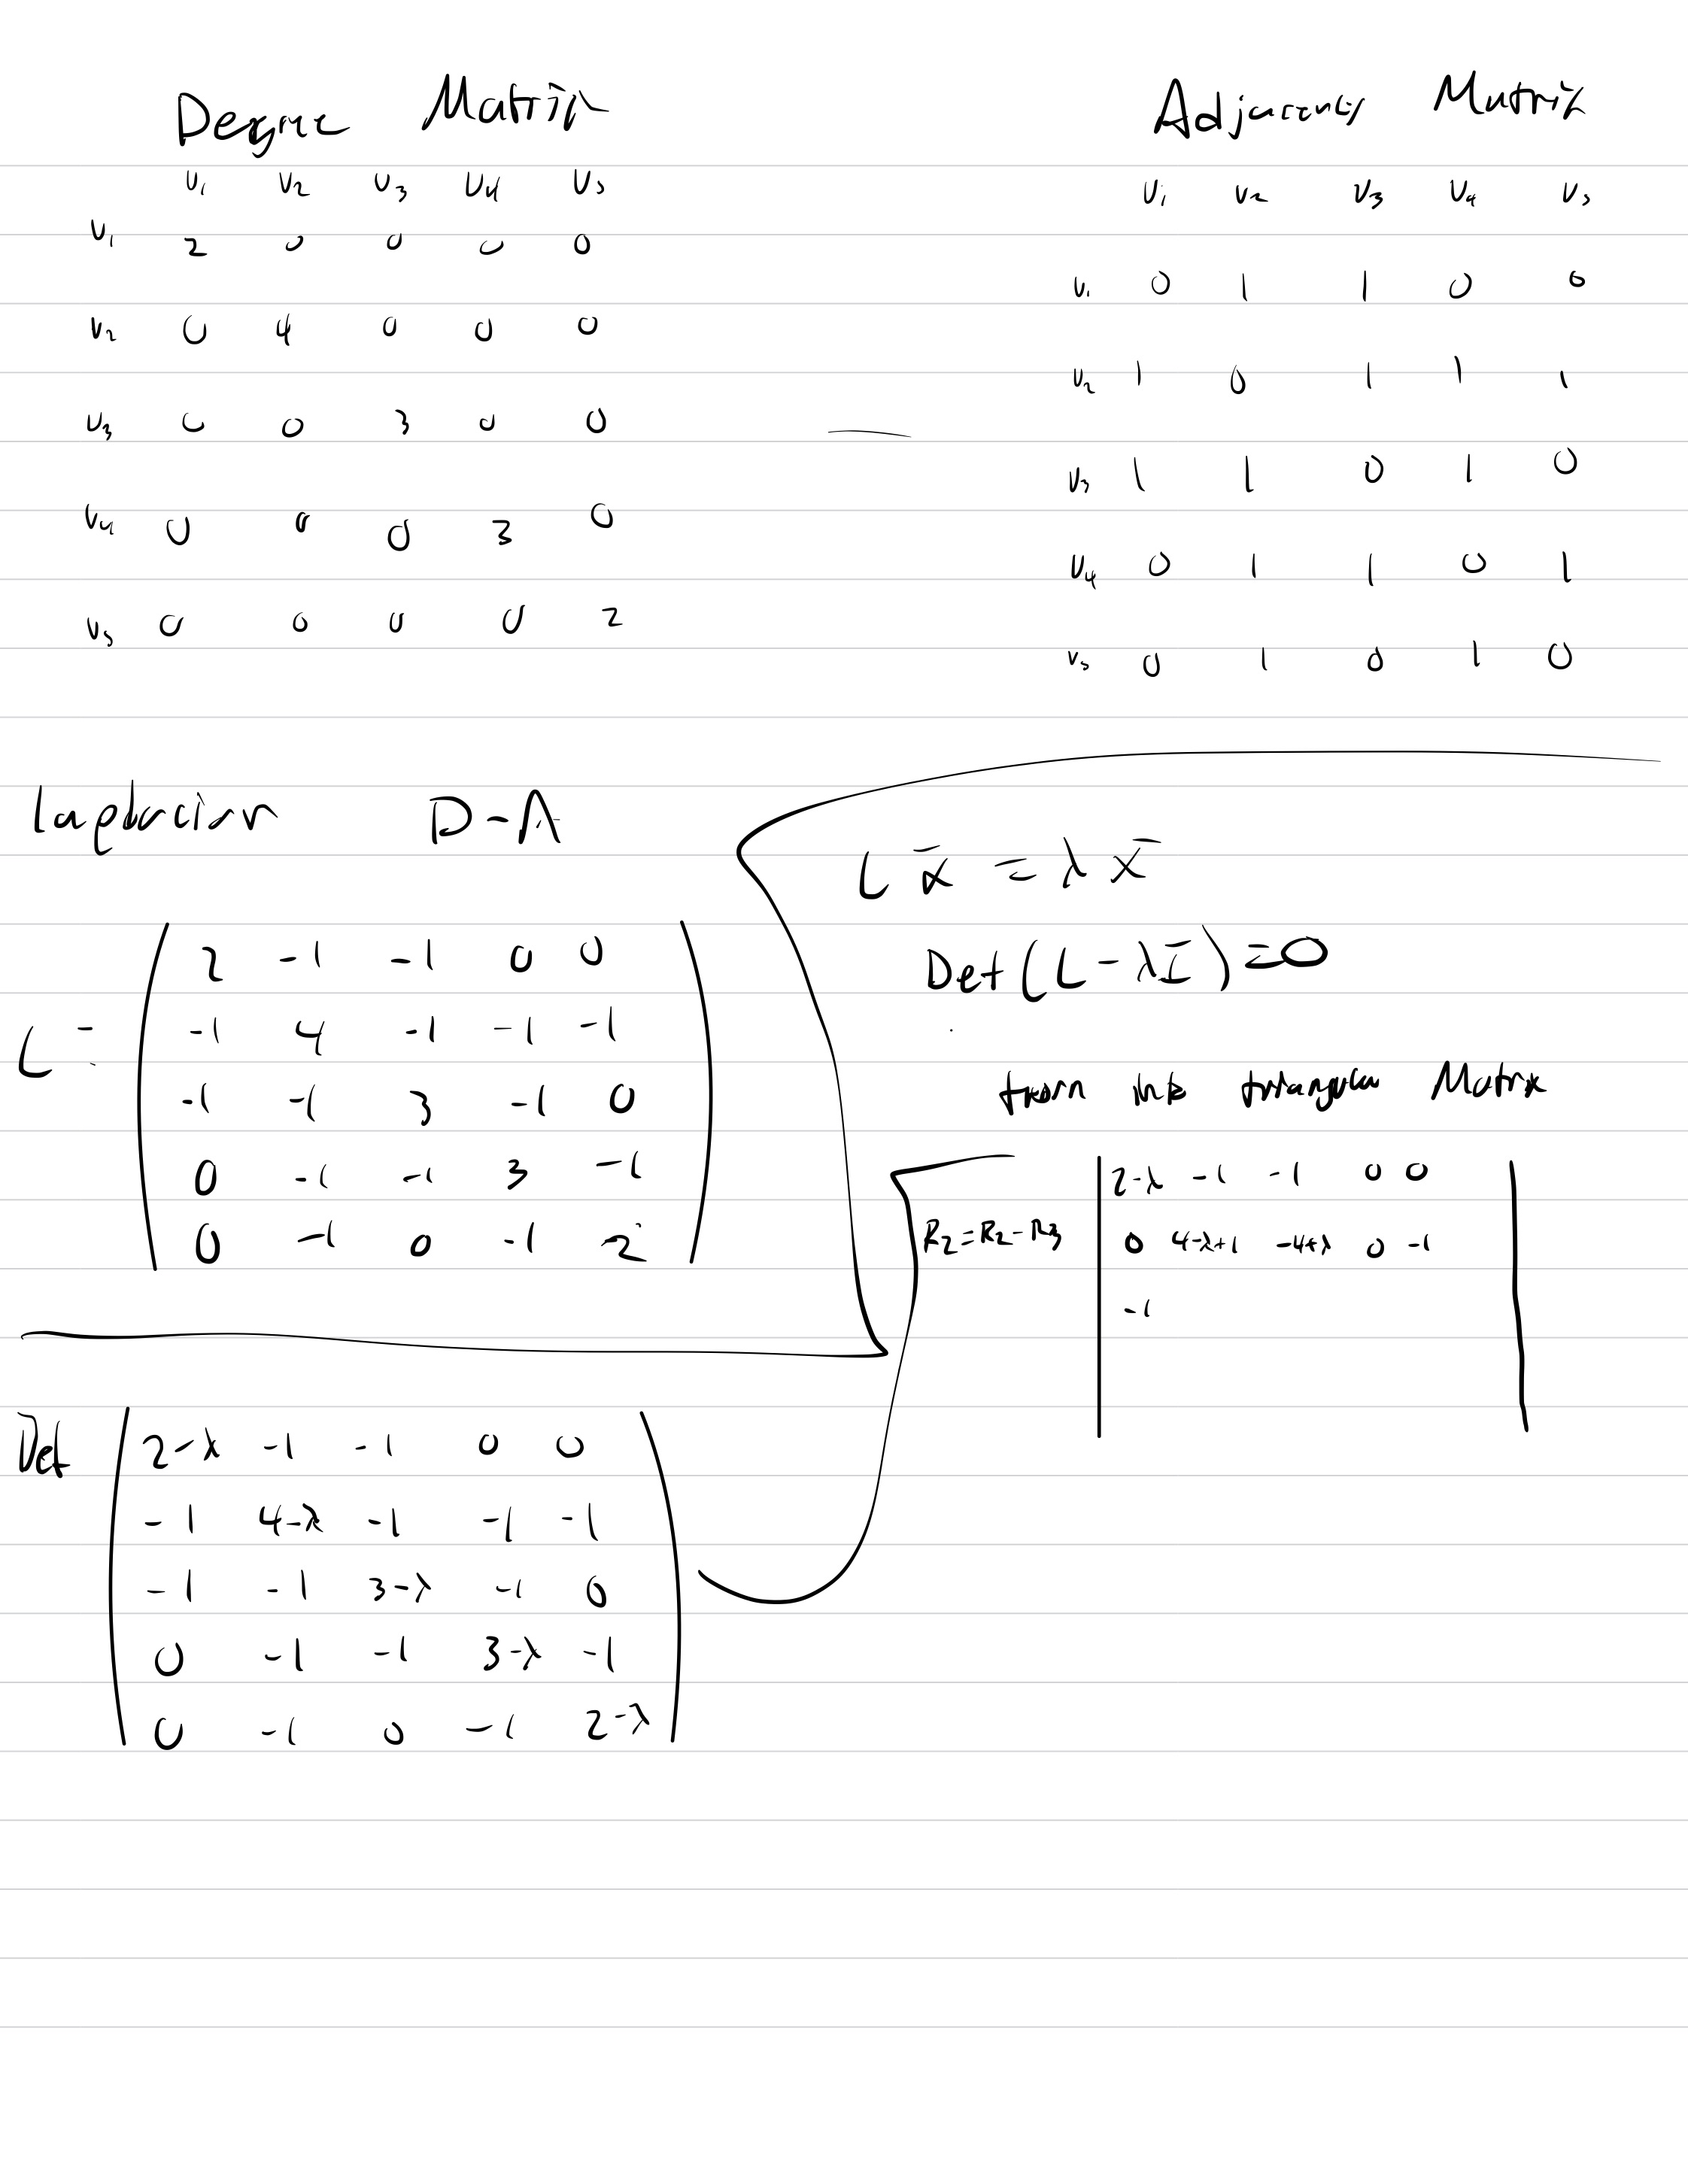

2. Can you find the second smallest eigen value and it's corresponding eigen vector ? 

In [87]:
L = np.array([[2,-1,-1,0,0],
              [-1,4,-1,-1,-1],
              [-1,-1,3,-1,0],
              [0,-1,-1,3,-1],
              [0,-1,0,-1,2]])
L

array([[ 2, -1, -1,  0,  0],
       [-1,  4, -1, -1, -1],
       [-1, -1,  3, -1,  0],
       [ 0, -1, -1,  3, -1],
       [ 0, -1,  0, -1,  2]])

In [94]:
e, v = np.linalg.eig(L)

print('eigenvalues:')
print(np.around(e,2))
# eigenvectors
print('eigenvectors:')
print(np.around(v,4))


eigenvalues:
[-0.    1.59  3.    5.    4.41]
eigenvectors:
[[ 0.4472  0.6533 -0.5    -0.2236 -0.2706]
 [ 0.4472  0.      0.      0.8944  0.    ]
 [ 0.4472  0.2706  0.5    -0.2236  0.6533]
 [ 0.4472 -0.2706  0.5    -0.2236 -0.6533]
 [ 0.4472 -0.6533 -0.5    -0.2236  0.2706]]


the second smallest eigen values is : 1.59 and the corrisponding eigen vector is : <0.65,0,0.27,-0.27,-0.65>

2. Plot all the eigen values in ascending order, then the eigen vector corresponds to eigen value = 0 and the fiedler eigen vector side by side in one figure. 

In [95]:
sortede = np.sort(e)

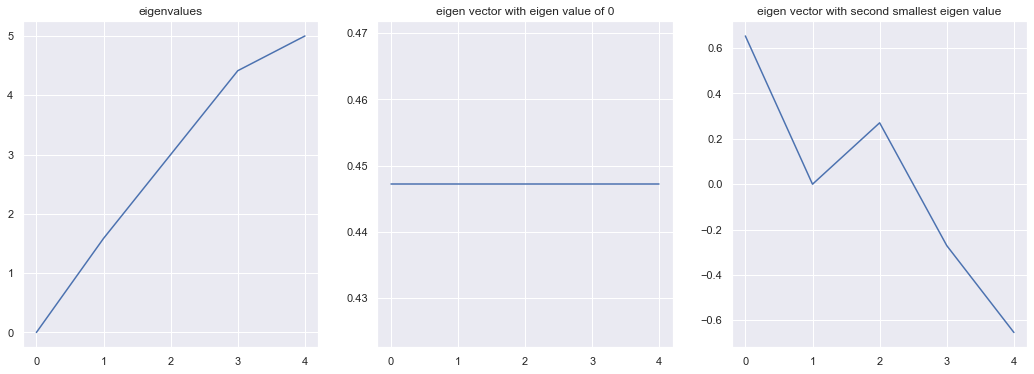

In [97]:
fig = plt.figure(figsize=[18, 6])


ax1 = plt.subplot(131)
plt.plot(sortede)
ax1.title.set_text('eigenvalues')



ax2 = plt.subplot(132)
plt.plot(v[:,0])
ax2.title.set_text('eigen vector with eigen value of 0')


ax3 = plt.subplot(133)
plt.plot(v[:,1])
ax3.title.set_text('eigen vector with second smallest eigen value')


plt.show()

# Question 3 

Generate the following moon shaped data. 

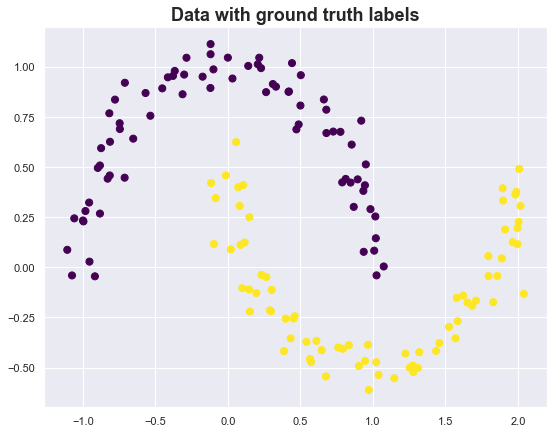

In [98]:
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

1. Before applying Kmeans with 2 clusters and spectral clustering with 2 clusters, explain whihc clustering algorithm will be appropriate and why ? 

spectral clustering would be the prefered kmethod for dealing with this type of data becuase the grouping/labeling of points is directly related to the eigen vecrtor corrisponding to the second lowest eigen value. this is becuase this eigen vector will have positive and negative values  the the number of changes in the sign represent the difrent groups we have. 

2. Apply both the clustering algorithms using the built in functions from sk.learn cluster. And plot the labels estimated by each algorithm. 

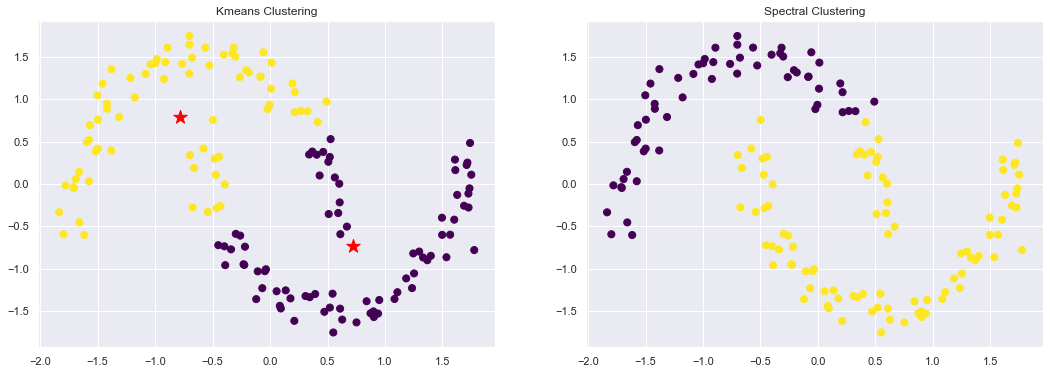

In [165]:
from sklearn.cluster import KMeans
X_mn = StandardScaler().fit_transform(X_mn)

kmeans = KMeans(n_clusters=2).fit(X_mn)

from sklearn.cluster import SpectralClustering


model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
spec_labels = model.fit_predict(X_mn)


fig = plt.figure(figsize=[18, 6])

ax1 = plt.subplot(121)
plt.scatter(X_mn[:, 0], X_mn[:, 1], c= kmeans.labels_, s=dot_size, cmap=cmap)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c= 'red', s=200, marker = '*')
ax1.title.set_text('Kmeans Clustering')


ax2 = plt.subplot(122)
plt.scatter(X_mn[:, 0], X_mn[:, 1], c= spec_labels, s=dot_size, cmap=cmap)
ax2.title.set_text('Spectral Clustering')

# Question 4

1. Consider the `USArrests` data. We will now perfrom hierarchical clustering on the states. You should pread the csv data and extract the numerical features and save it as a  X matrix. 

2.  Using hierarchical clustering with `complete linkage` and cluster the state in three distinct clusters. Which states belong to same clusters ?

In [157]:
from sklearn.cluster import AgglomerativeClustering, KMeans


x = pd.read_csv('USArrests.csv')
X = x.iloc[:,1:5]
hcmodel = AgglomerativeClustering( n_clusters=3, linkage ='complete')
hc_comp_labels = hcmodel.fit_predict(X)
hc_comp_labels


array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

3. Draw the dendogram of the clusters. Where should you cut the dendogram to get 3 clusters ?


Text(0.5, 0, 'states')

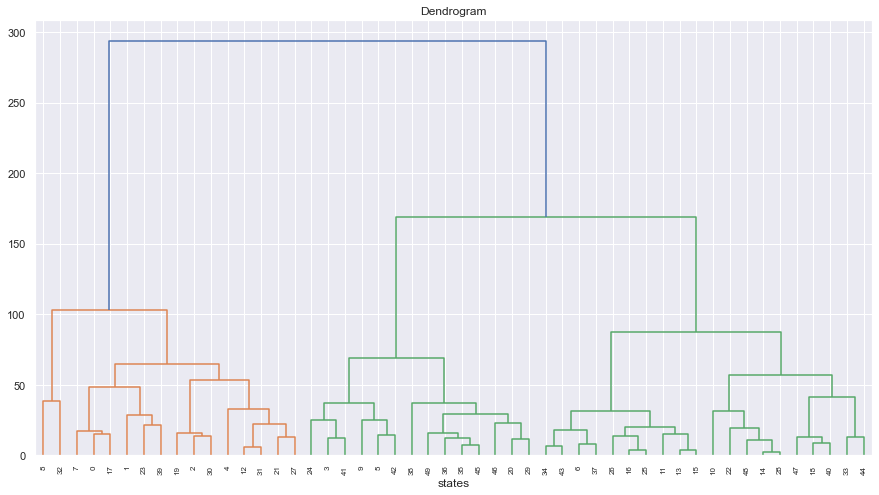

In [124]:

plt.figure(figsize=(15,8))


dendrogram = sch.dendrogram(sch.linkage(X, method = "complete"))
plt.title('Dendrogram')
plt.xlabel('states')


3. Now scale the data so that each columns (features) has mean 0 and standard deviation 1. Then hierarchically cluster the states using `complete linkage`. 

In [153]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X.to_numpy())

hcmodel = AgglomerativeClustering( n_clusters=3, linkage ='complete')
hc_comp_labels_scaled = hcmodel.fit_predict(X_scaled)

hc_comp_labels_scaled

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0])

Text(0.5, 0, 'states')

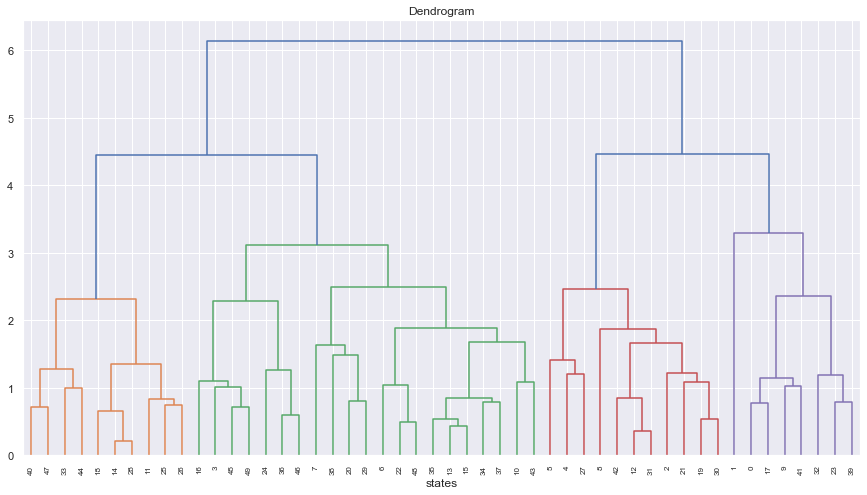

In [160]:
plt.figure(figsize=(15,8))


dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = "complete"))
plt.title('Dendrogram')
plt.xlabel('states')



In [154]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA",
         "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", 
         "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [155]:
import plotly.express as px

fig = px.choropleth(locations= states, locationmode="USA-states", color = hc_comp_labels+1   , scope="usa")
fig.show()

In [156]:
fig = px.choropleth(locations= states, locationmode="USA-states", color = hc_comp_labels_scaled+1  , scope="usa")
fig.show()

4. What effect does scaling the variables or features have on the hierarchical clustering obtained. In your opinion, should the variables be scaled before the dissmilarities or similarities are computed ? 

scaling the data changes the partitions made in the dendogram as shown  therefore it affects the clusters obtained from the model , if things are scaled it should happen before the computation

# Question 5 

For this question, I recommend you to draw in your notebook and then take a screen shot and add it in the markdown. 
Your drawings and screenshot should be clear and visible to the TA. 

Suppose that we have 4 observations , for which we compute a dissimilarity matrix, given by 

$$\begin{bmatrix}     
&0.3 &0.4  &0.7 \\
0.3 &    &0.5  &0.8 \\
0.4 &0.5 &     &0.45 \\
0.7 &0.8 &0.45     \\ 
\end{bmatrix}$$
For instance, the dissimilarity between the first and second observation is 0.3, and the dissimilarity between the second and fourth observations is 0.8. 

1. On the basis of this dissimilarity between the first and second observtions, sketch the dendogram that results from hierarchically clustering these 4 observations using `complete linkage`. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendogram. 

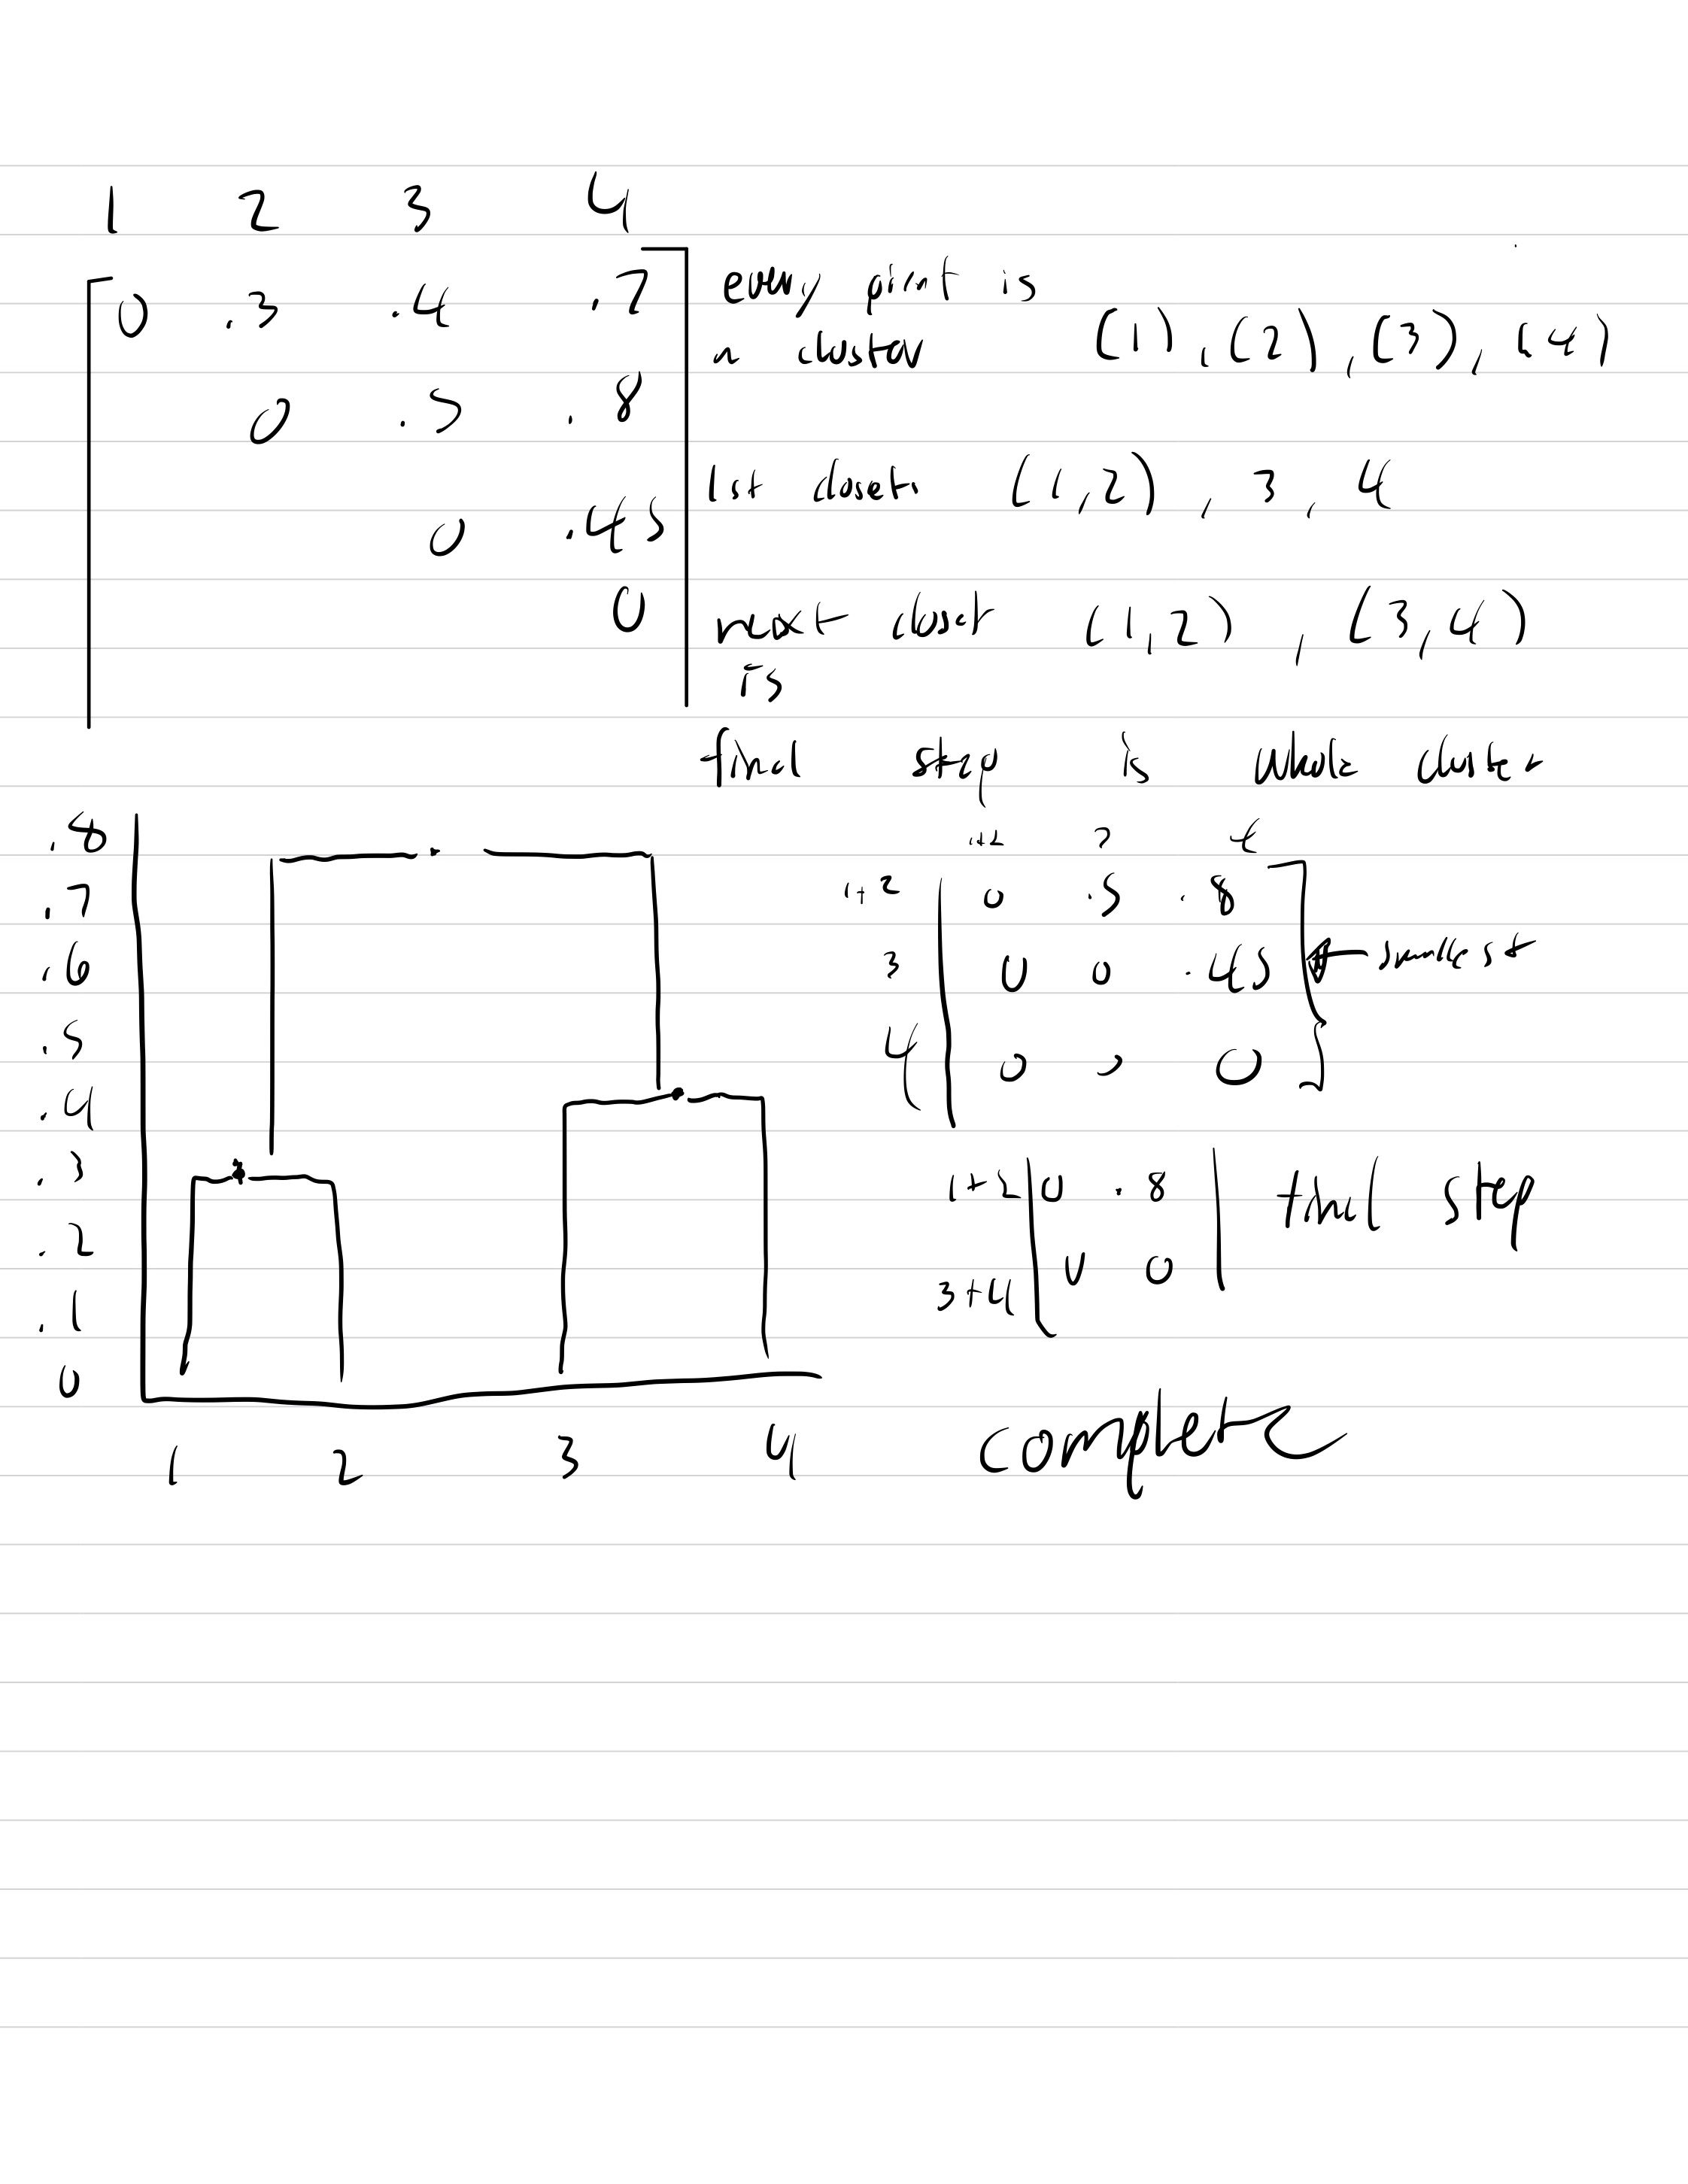

2. Repeat the part 1, this time using the `single linkage` clustering. 

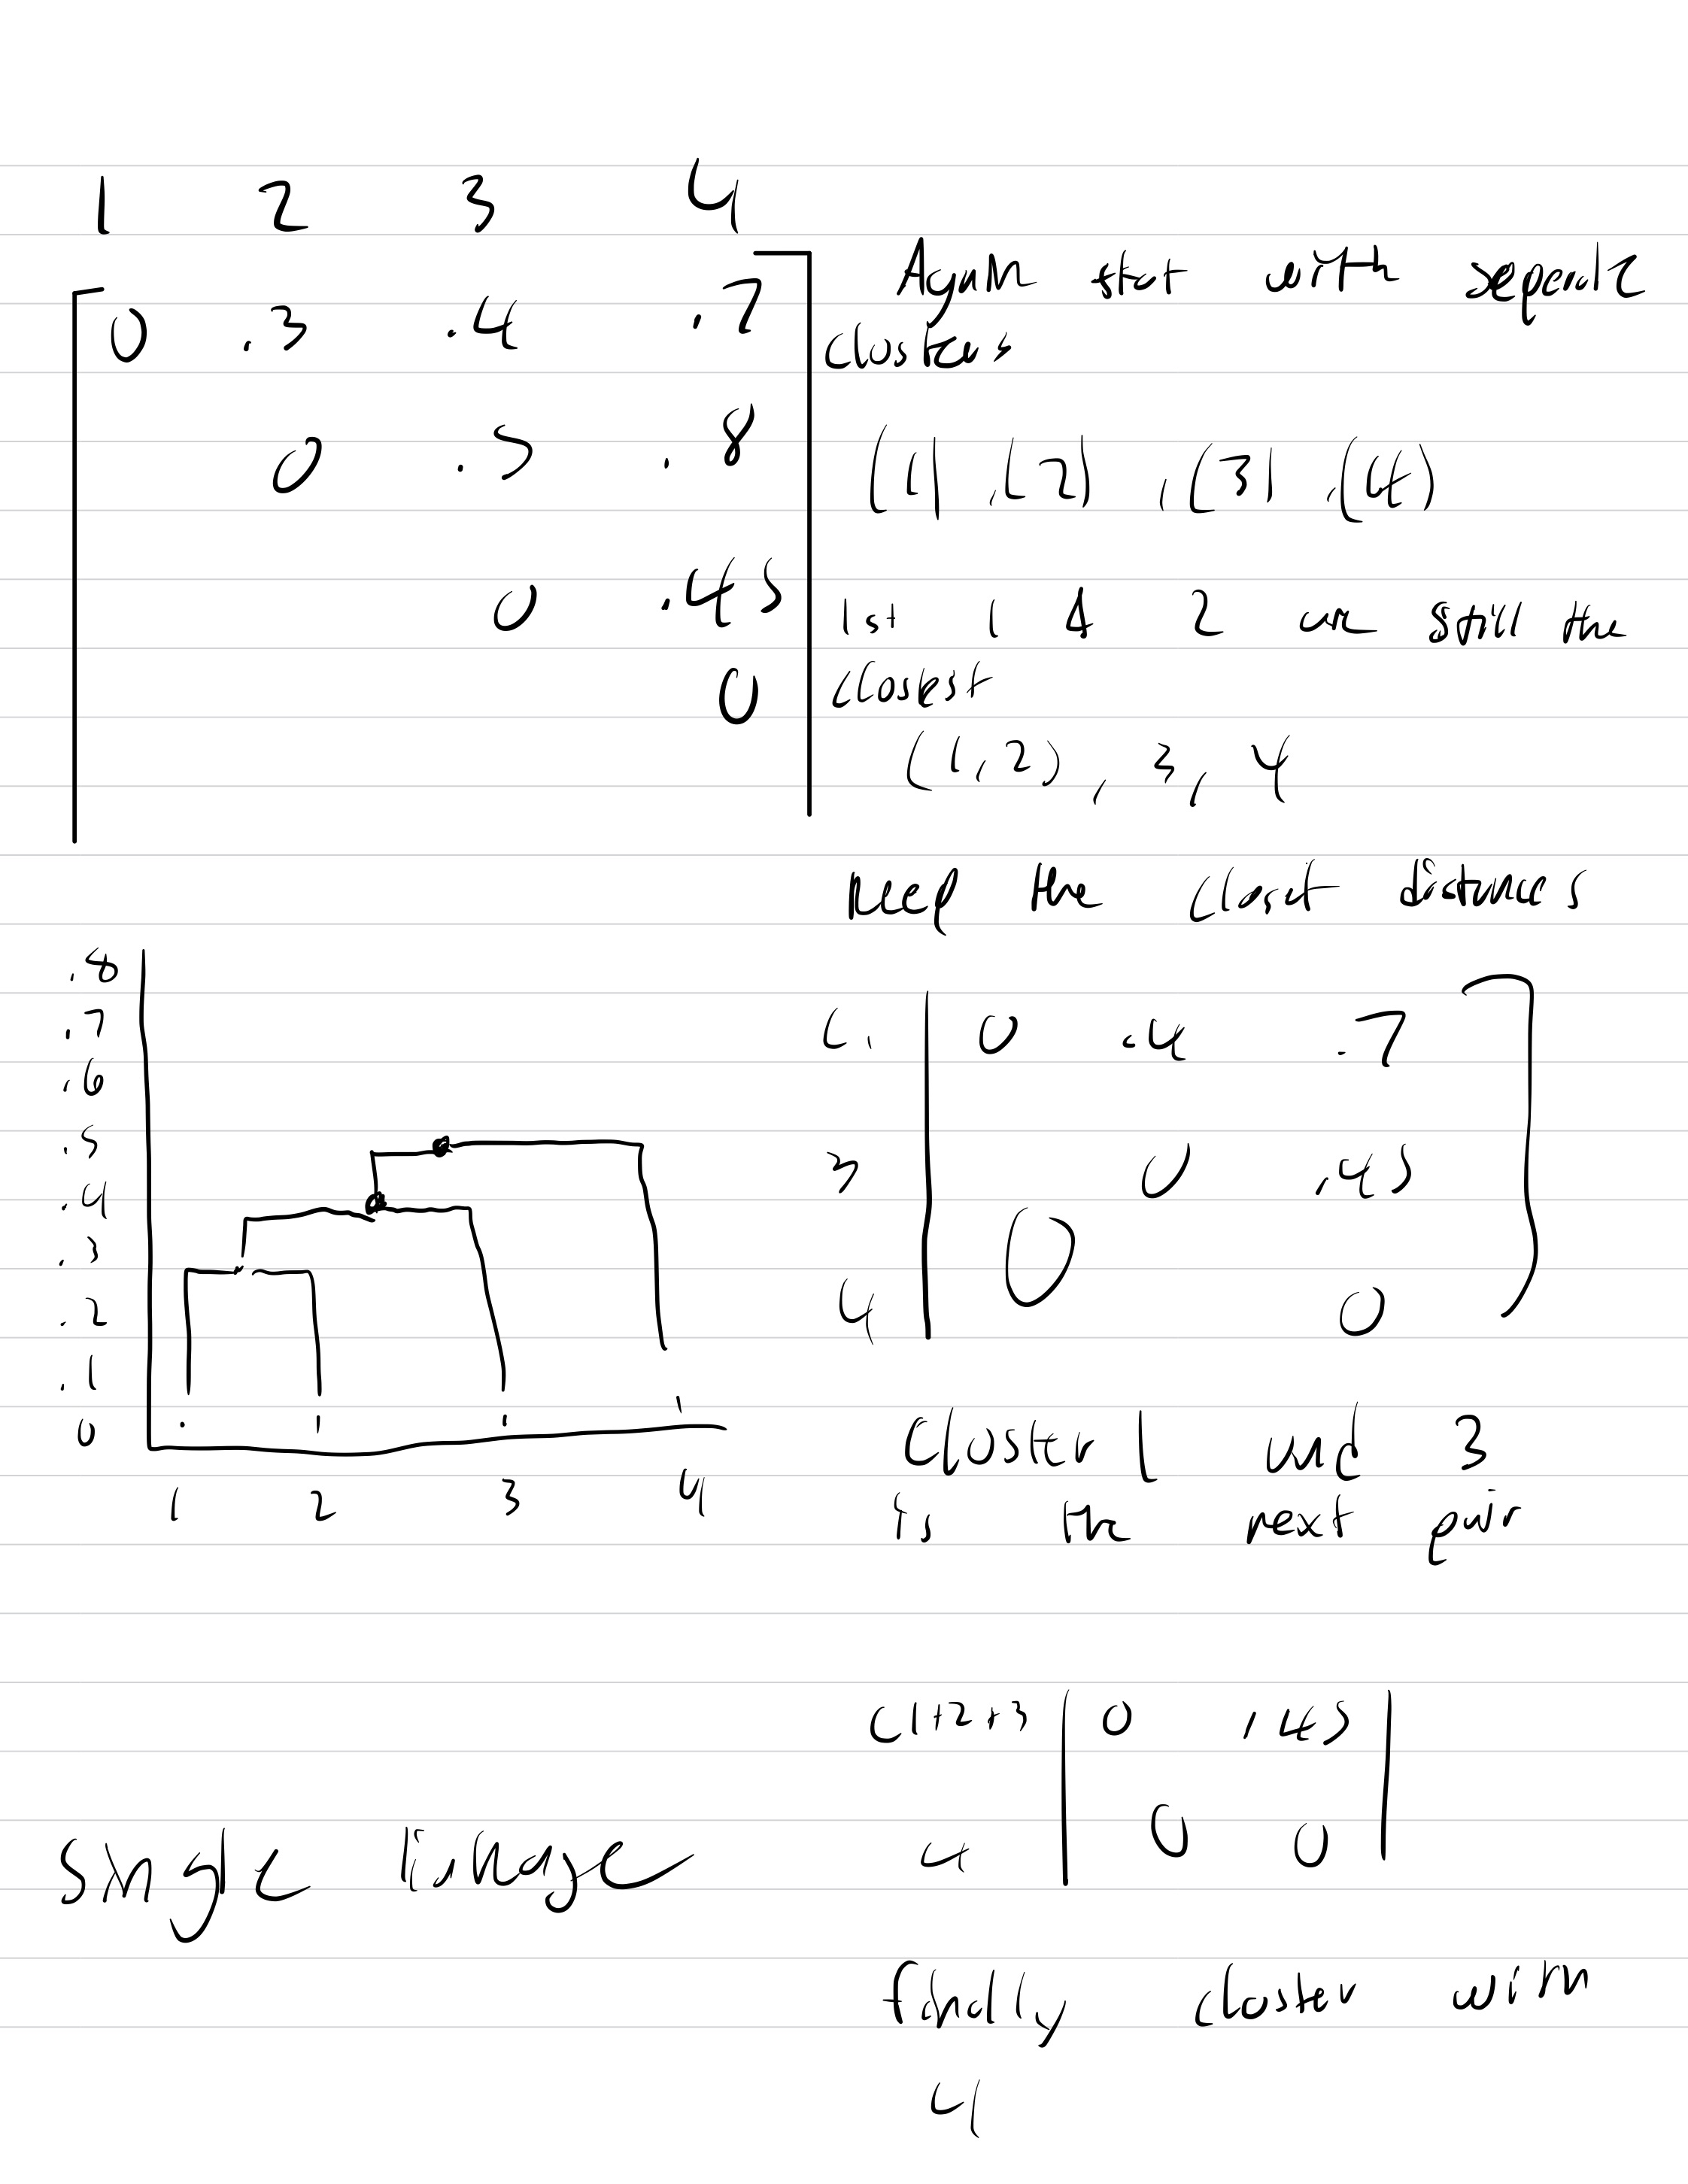